In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays

# Analyse van de opgekuiste data

In [24]:
kijkcijfers = pd.read_csv('./data/processed/tv_kijkcijfers_weer.csv')
kijkcijfers['timestamp'] = pd.to_datetime(kijkcijfers['timestamp'])
kijkcijfers.sample(10)

,timestamp,channel,program,duration_sec,live,viewers,weather_code,temperature,rain,windspeed,snowfall,precipitation
22880,2019-11-26 20:39:24,EEN,HET HUIS - WILLY SOMMERS,3255.0,0,846704,3.0,11.0,0.0,20.2,0.0,0.0
49316,2023-07-30 18:12:53,VRT 1,NADIYA'S AMERICAN ADVENTURE,2609.0,7,321104,51.0,18.2,0.3,25.2,0.0,0.3
51390,2023-11-11 18:59:49,VTM,NIEUWS 19U VTM,2568.0,7,566299,0.0,6.4,0.0,8.0,0.0,0.0
3688,2017-04-06 13:00:04,EEN,HET 1 UUR-JOURNAAL,1455.0,0,383704,3.0,9.6,0.0,12.4,0.0,0.0
57160,2024-09-06 22:29:59,VRT 1,EEN DAG IN PARIJS,2008.0,28,140259,2.0,17.0,0.0,4.3,0.0,0.0
29661,2020-11-14 19:46:30,EEN,HET GROOTSTE LICHTPUNT TEGEN KANKER,1730.0,0,761666,3.0,13.3,0.0,24.5,0.0,0.0
30395,2020-12-21 20:36:18,Canvas,EPIC YELLOWSTONE - FIRE AND ICE,2935.0,0,252187,51.0,11.7,0.3,27.3,0.0,0.3
11429,2018-04-29 18:11:23,EEN,DAGELIJKSE KOST,2723.0,0,330623,51.0,12.2,0.2,14.7,0.0,0.2
30472,2020-12-25 12:59:54,VTM,NIEUWS 13U VTM,1585.0,0,274166,1.0,5.1,0.0,14.3,0.0,0.0
42253,2022-08-05 21:18:40,EEN,VERA,5350.0,0,380198,0.0,15.3,0.0,8.7,0.0,0.0


### Meer datetime features

In [25]:
kijkcijfers['timestamp'] = pd.to_datetime(kijkcijfers['timestamp'])

# Functie om seizoen uit datum te halen
def get_season(date):
    if date.month in [3, 4, 5]:
        return 'lente'
    elif date.month in [6, 7, 8]:
        return 'zomer'
    elif date.month in [9, 10, 11]:
        return 'herfst'
    else:
        return 'winter'

kijkcijfers['season'] = kijkcijfers['timestamp'].apply(get_season)

# weekday toevoegen
kijkcijfers['weekday'] = kijkcijfers['timestamp'].dt.weekday

# uur toevoegen
kijkcijfers['hour'] = kijkcijfers['timestamp'].dt.hour

# dag toevoegen
kijkcijfers['day'] = kijkcijfers['timestamp'].dt.day

# maand toevoegen
kijkcijfers['month'] = kijkcijfers['timestamp'].dt.month

# isWeekend toevoegen
kijkcijfers['isWeekend'] = kijkcijfers['weekday'].apply(lambda x: 1 if x in [5, 6] else 0)

# isPrimeTime toevoegen
kijkcijfers['isPrimeTime'] = kijkcijfers['hour'].apply(lambda x: 1 if x >= 18 and x <= 23 else 0)

# isHoliday toevoegen
be_holidays = holidays.BE()
kijkcijfers['isHoliday'] = kijkcijfers['timestamp'].apply(lambda x: 1 if x in be_holidays else 0)

### Kanalen

In [26]:
aantal_kanalen = kijkcijfers['channel'].nunique()
print(f'Aantal verschillende kanalen: {aantal_kanalen}')

Aantal verschillende kanalen: 32


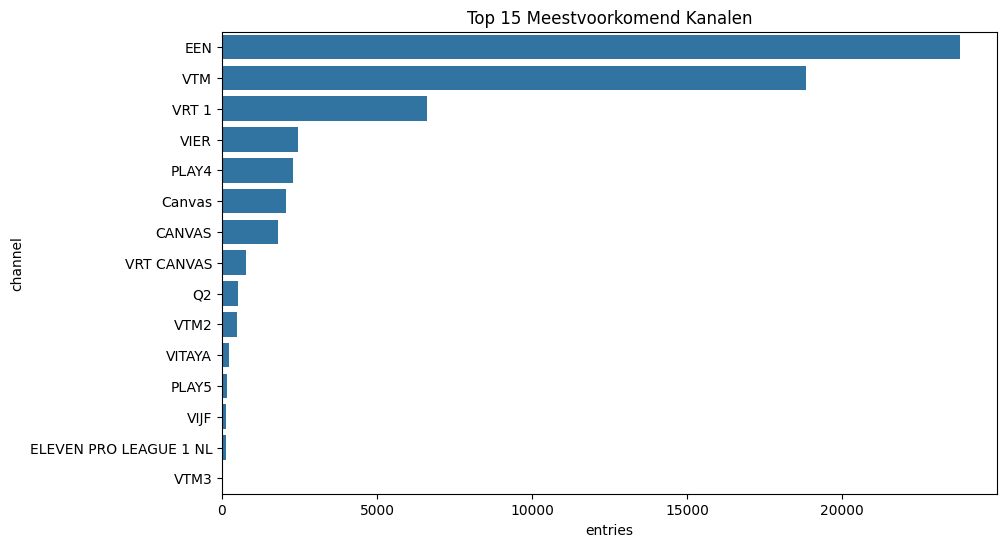

In [27]:
top_15_kanalen = kijkcijfers['channel'].value_counts().head(15)

# Plot histogram van top 15 kanalen
plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_channels.values, y=top_15_channels.index)
plt.xlabel('entries')
plt.ylabel('channel')
plt.title('Top 15 Meestvoorkomend Kanalen')
plt.show()

### Programma's

In [28]:
aantal_prog = kijkcijfers['program'].nunique()
print(f'Aantal verschillende kanalen: {aantal_prog}')

Aantal verschillende kanalen: 5925


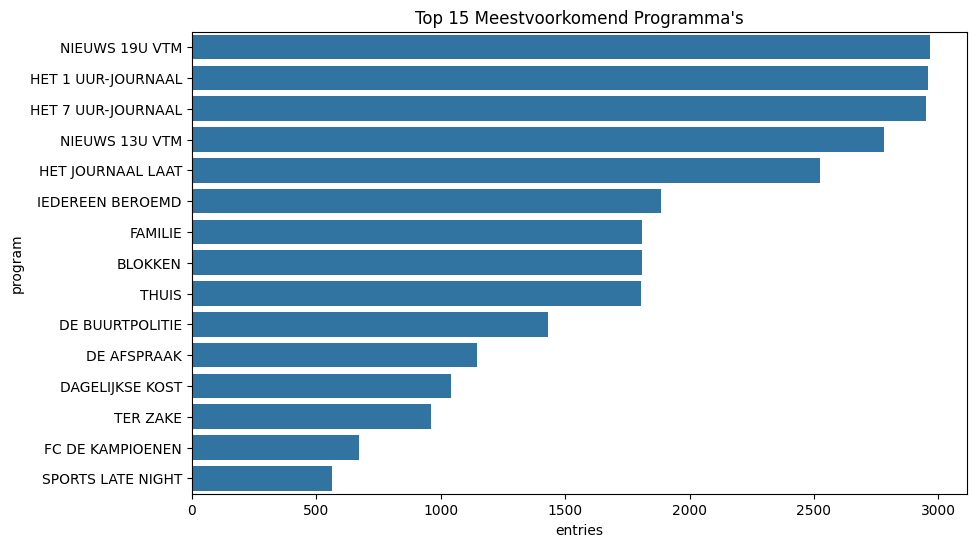

In [29]:
top_15_prog = kijkcijfers['program'].value_counts().head(15)

# Plot histogram van top 15 programma's
plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_prog.values, y=top_15_prog.index)
plt.xlabel('entries')
plt.ylabel('program')
plt.title('Top 15 Meestvoorkomend Programma\'s')
plt.show()

### Periodieke data

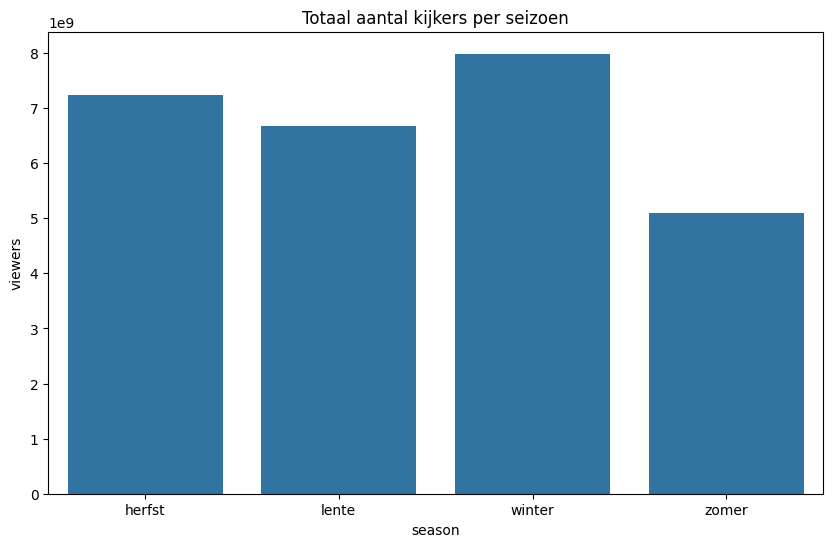

In [31]:
total_viewers_per_season = kijkcijfers.groupby('season')['viewers'].sum()

# Plot histogram van totaal aantal kijkers per seizoen
plt.figure(figsize=(10, 6))
sns.barplot(x=total_viewers_per_season.index, y=total_viewers_per_season.values)
plt.xlabel('season')
plt.ylabel('viewers')
plt.title('Totaal aantal kijkers per seizoen')
plt.show()